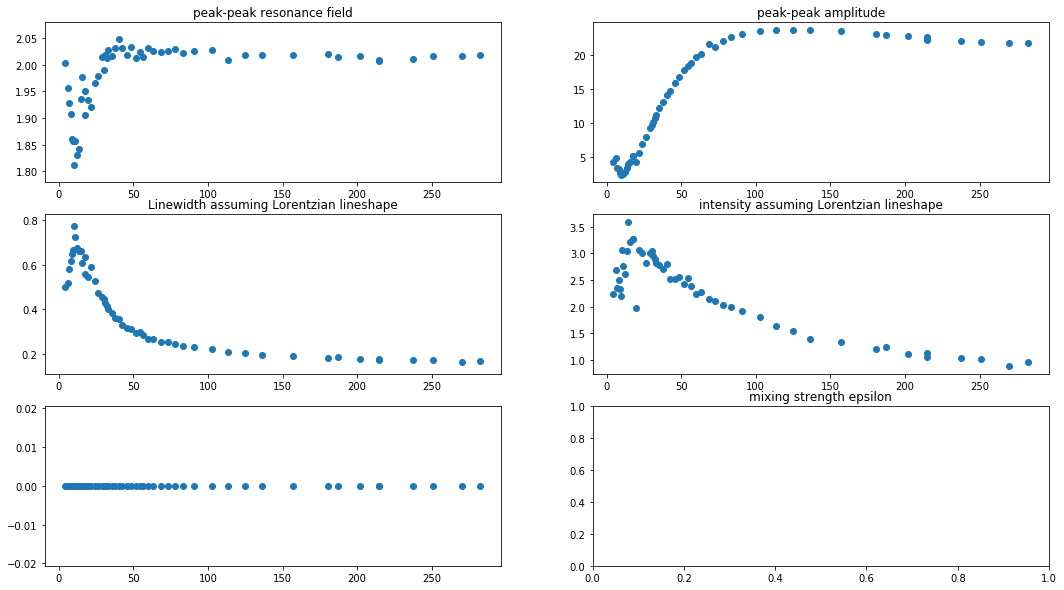

In [50]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline
###############################################################################################
###############################################################################################

# which compound are you looking at
# for LiCuFe2(VO4)3 enter 'Li'
# for NaCuFe2(VO4)3 enter 'Na'
compound = 'Na'

###############################################################################################
###############################################################################################

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
folder1 = folder + '\\individual_fit_curves\\single_Lorentzian_w_phase_mixing'
#folder1 = folder + '\\individual_fit_curves\\single_Lorentzian'

files = os.listdir(folder1)

temperatures = []
for name in files:
    temp_new = name[name.find('es')+3 : name.find('K')-1]  
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)
    
files = files[temperatures.argsort()]
temperatures = sorted(temperatures)

Hpp = np.zeros(len(files))
Ym = np.zeros(len(files))
gpp = np.zeros(len(files))
epsilonpp = np.zeros(len(files))

i = 0
for filename in files:
    
    field, amp, fit, raw, background = data_import(folder1+'\\'+filename, 3)

###############################################################################################
###############################################################################################
    
    # choose if you want to look at the raw data: data = raw
    # or at the one where a background is subtracted: data = amp
    data = amp

###############################################################################################
###############################################################################################
    
    maximum = max(data)
    minimum = min(data)
    
    index_max = field[abs(data-maximum)<0.0001][-1]
    index_min = field[abs(data-minimum)<0.0001][0]
    
    epsilona =  2*np.sqrt(3) * (maximum+minimum)/2 / abs(maximum - minimum)
    epsilon = 0
    #epsilon = np.sin(mixing_angle[i]*np.pi/180)
    
    gpp[i] = 9.64/( (index_max + index_min)/2 ) / 13.98
    Hpp[i] = abs(index_max-index_min) / (1 - epsilona**2 / 2)
    Ym[i] = abs(maximum - minimum)/2 / (1 - epsilona**2 / 18)
    epsilonpp[i] = epsilon
    
    i = i + 1

    
    
#Ym = switch(Ym, 34, 35)
Ym = switch(Ym, 13, 14)
#Ym = switch(Ym, 12, 13)

# assuming a Lorentzian lineshape    
width = 1.7321 * Hpp
intensity = np.pi/2 * width**2 * Ym



fig, axes = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(18,10))

axes[0,0].set_title('peak-peak resonance field')
axes[0,0].scatter(temperatures, gpp)


Ym, dYm = rescale_A (Ym, np.zeros(len(Ym)), compound)
axes[0,1].set_title('peak-peak amplitude')
axes[0,1].scatter(temperatures, Ym)

axes[1,0].set_title('Linewidth assuming Lorentzian lineshape')
axes[1,0].scatter(temperatures, width)

A, dA = rescale_A (intensity, np.zeros(len(intensity)), compound)
axes[1,1].set_title('intensity assuming Lorentzian lineshape')
axes[1,1].scatter(temperatures, A)

axes[2,1].set_title('mixing strength epsilon')
axes[2,0].scatter(temperatures, epsilonpp)

In [ ]:
# background from fitting one Lorentzian without phase mixing
Hpp_no_pm = Hpp
Ym_no_pm = Ym
width_no_pm = width
A_no_pm = A
g_no_pm = gpp
epsilon_no_pm = epsilonpp
tempera = temperatures

In [51]:
# raw data
Hpp_raw = Hpp
Ym_raw = Ym
width_raw = width
A_raw = A
g_raw = gpp
epsilon_raw = epsilonpp
tempera = temperatures

In [ ]:
# background from fitting one Lorentzian with phase mixing
Hpp_amp = Hpp
Ym_amp = Ym
width_amp = width
A_amp = A
g_amp = gpp
epsilon_amp = epsilonpp
tempera = temperatures

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(18,10))

axes[0,0].set_title('peak-peak distance')
axes[0,0].scatter(temperatures, Hpp_raw)
axes[0,0].scatter(temperatures, Hpp_amp)
axes[0,0].scatter(temperatures, Hpp_no_pm)
axes[0,0].legend(['raw data', 'background w pm', 'background wo pm'])

axes[0,1].set_title('peak-peak amplitude')
axes[0,1].scatter(temperatures, Ym_raw)
axes[0,1].scatter(temperatures, Ym_amp)
axes[0,1].scatter(temperatures, Ym_no_pm)
axes[0,1].legend(['raw data', 'background w pm', 'background wo pm'])

axes[1,0].set_title('Linewidth assuming Lorentzian lineshape')
axes[1,0].scatter(temperatures, width_raw)
axes[1,0].scatter(temperatures, width_amp)
axes[1,0].scatter(temperatures, width_no_pm)
axes[1,0].legend(['raw data', 'background w pm', 'background wo pm'])

axes[1,1].set_title('intensity assuming Lorentzian lineshape')
axes[1,1].scatter(temperatures, A_raw)
axes[1,1].scatter(temperatures, A_amp)
axes[1,1].scatter(temperatures, A_no_pm)
axes[1,1].legend(['raw data', 'background w pm', 'background wo pm'])

In [ ]:
data = [temperatures, Hpp_raw, Ym_raw, width_raw, A_raw, Hpp_amp, Ym_amp, width_amp, A_amp, 
        Hpp_no_pm, Ym_no_pm, width_no_pm, A_no_pm]        
names = ['T', 'Hpp', 'Ym', 'linewidth', 'intensity', 'Hpp', 'Ym', 'linewidth', 'intensity',
        'Hpp', 'Ym', 'linewidth', 'intensity']
units = ['K', 'T', 'a.u.', 'T', 'a.u.', 'T', 'a.u.', 'T', 'a.u.', 'T', 'a.u.', 'T', 'a.u.']
comments = ['', 'raw data', 'raw data', 'raw data', 'raw data', 
            'background w pm', 'background w pm', 'background w pm', 'background w pm',
           'background wo pm', 'background wo pm', 'background wo pm', 'background wo pm']
    
#save(data, names, units, comments, folder+'\\direct_analysis_of_data\\direct_extraction_of_intensity_linewidth.txt' )

# Instead of just taking the maximum and minimum, fit a function to the data

In [61]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline 

In [72]:
compound = 'Li'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing.txt'

T, B01, dB01, gamma1, dgamma1, A1, dA1, l, dl, m, dm, n, dn, freq, mixing_angle, dangle = data_import(filename, 3)

In [73]:
def quadratic (x, a, b, c):
    return a*x**2 + b*x + c

def cubic (x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [74]:
###############################################################################################
###############################################################################################

# which compound are you looking at
# for LiCuFe2(VO4)3 enter 'Li'
# for NaCuFe2(VO4)3 enter 'Na'
#compound = 'Li'

###############################################################################################
###############################################################################################
x_values = []
y_values = []
data_points = []
field_values = []




if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
folder1 = folder + '\\individual_fit_curves\\single_Lorentzian_w_phase_mixing'
#folder1 = folder + '\\individual_fit_curves\\single_Lorentzian'

files = os.listdir(folder1)

temperatures = []
for name in files:
    temp_new = name[name.find('es')+3 : name.find('K')-1]  
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)
    
files = files[temperatures.argsort()]
temperatures = sorted(temperatures)

Hpp_q = np.zeros(len(files))
Ym_q = np.zeros(len(files))
gpp_q = np.zeros(len(files))
Hpp_c = np.zeros(len(files))
Ym_c = np.zeros(len(files))

Hpp_fit = np.zeros(len(files))
Ym_fit = np.zeros(len(files))

i = 0
for filename in files:
    
    field, amp, fit, raw, background = data_import(folder1+'\\'+filename, 3)

###############################################################################################
###############################################################################################
    
    # choose if you want to look at the raw data: data = raw
    # or at the one where a background is subtracted: data = amp
    data = amp

###############################################################################################
###############################################################################################
    
    maximum = max(data)
    minimum = min(data)
    index_max = field[abs(data-maximum)<0.0001][-1]
    index_min = field[abs(data-minimum)<0.0001][0]
    
    
    # analysis for maximum
    up = index_max + 0.03
    low = index_max - 0.03
    mask = [np.all([i>low, i<up]) for i in field]
    popt1, pcov1 = curve_fit(quadratic, field[mask], data[mask])
    popt2, pcov2 = curve_fit(cubic, field[mask], data[mask])
    
    data1 = quadratic(field[mask], popt1[0], popt1[1], popt1[2])
    data2 = cubic(field[mask], popt2[0], popt2[1], popt2[2], popt2[3])
    
    maximum1 = max(data1)
    index_max1 = field[mask][abs(data1-maximum1)<0.0001][-1]
        
    maximum2 = max(data2)
    index_max2 = field[mask][abs(data2-maximum2)<0.0001][-1]
        
    
    
    # analysis for minimum
    up = index_min + 0.01
    low = index_min - 0.01
    mask = [np.all([i>low, i<up]) for i in field]
    popt1, pcov1 = curve_fit(quadratic, field[mask], data[mask])
    popt2, pcov2 = curve_fit(cubic, field[mask], data[mask])
    
    data1 = quadratic(field[mask], popt1[0], popt1[1], popt1[2])
    data2 = cubic(field[mask], popt2[0], popt2[1], popt2[2], popt2[3])
    
    minimum1 = min(data1)
    index_min1 = field[mask][abs(data1-minimum1)<0.0001][0]
    
    minimum2 = min(data2)
    index_min2 = field[mask][abs(data2-minimum2)<0.0001][0]
    
    epsilonq = 2*np.sqrt(3) * (maximum1+minimum1)/2 / abs(maximum1 - minimum1)
    epsilonq = 0
    Hpp_q[i] = abs(index_max1-index_min1) / (1 + epsilonq**2/2)
    Ym_q[i] = abs(maximum1 - minimum1)/2 / (1 - epsilonq**2/18)
    
    gpp_q[i] = freq[i]/( (index_max1 + index_min1)/2 ) / 13.98
    
    epsilonc = 2*np.sqrt(3) * (maximum2+minimum2)/2 / abs(maximum2 - minimum2)
    epsilonc = 0
    Hpp_c[i] = abs(index_max2-index_min2) / (1 + epsilonc**2/2)
    Ym_c[i] = abs(maximum2 - minimum2)/2 / (1 - epsilonc**2/18)
    
    
    # analysis for fit
    maximum_fit = max(fit)
    minimum_fit = min(fit)
    
    index_max_fit = field[abs(fit-maximum_fit)<0.0001][-1]
    index_min_fit = field[abs(fit-minimum_fit)<0.0001][0]
    
    
    #epsilon = np.sin(mixing_angle[i]*np.pi/180)
    epsilon =  2*np.sqrt(3) * (maximum_fit+minimum_fit)/2 / abs(maximum_fit - minimum_fit)
    
    Hpp_fit[i] = abs(index_max_fit-index_min_fit) / (1 + epsilon**2/2)
    Ym_fit[i] = abs(maximum_fit - minimum_fit)/2 / (1 - epsilon**2/18)
    
    
    
    i = i + 1

    
    data_points.append(data)
    x_values.append([index_max2, index_min2])
    y_values.append([maximum2, minimum2])
    field_values.append(field)
    
    
Ym_q = switch(Ym_q, 13, 14)
Ym_c = switch(Ym_c, 13, 14)
Ym_fit = switch(Ym_fit, 13, 14)
Ym_fit = switch(Ym_fit, 34, 35)
#Ym = switch(Ym, 12, 13)

# assuming a Lorentzian lineshape    
Ym_q, dYm_q = rescale_A (Ym_q, np.zeros(len(Ym_q)), compound)
width_q = 1.7321 * Hpp_q
intensity_q = np.pi/2 * width_q**2 * Ym_q

Ym_c, dYm_c = rescale_A (Ym_c, np.zeros(len(Ym_c)), compound)
width_c = 1.7321 * Hpp_c
intensity_c = np.pi/2 * width_c**2 * Ym_c

Ym_fit, dYm_fit = rescale_A (Ym_fit, np.zeros(len(Ym_fit)), compound)
width_fit = 1.7321 * Hpp_fit
intensity_fit = np.pi/2 * width_fit**2 * Ym_fit

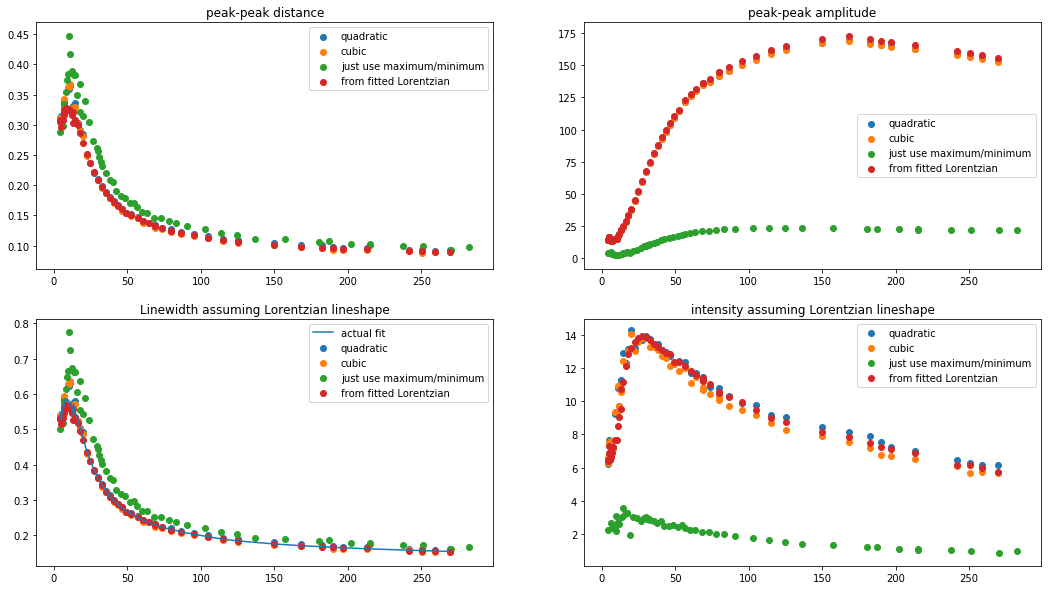

In [75]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(18,10))

axes[0,0].set_title('peak-peak distance')
axes[0,0].scatter(temperatures, Hpp_q)
axes[0,0].scatter(temperatures, Hpp_c)
axes[0,0].scatter(tempera, Hpp_raw)
axes[0,0].scatter(temperatures, Hpp_fit)
axes[0,0].legend(['quadratic', 'cubic', 'just use maximum/minimum', 'from fitted Lorentzian'])

axes[0,1].set_title('peak-peak amplitude')
axes[0,1].scatter(temperatures, Ym_q)
axes[0,1].scatter(temperatures, Ym_c)
axes[0,1].scatter(tempera, Ym_raw)
axes[0,1].scatter(temperatures, Ym_fit)
axes[0,1].legend(['quadratic', 'cubic', 'just use maximum/minimum', 'from fitted Lorentzian'])

axes[1,0].set_title('Linewidth assuming Lorentzian lineshape')
axes[1,0].scatter(temperatures, width_q)
axes[1,0].scatter(temperatures, width_c)
axes[1,0].scatter(tempera, width_raw)
axes[1,0].scatter(temperatures, width_fit)
axes[1,0].plot(T, gamma1/10000*2)
axes[1,0].legend(['actual fit', 'quadratic', 'cubic', 'just use maximum/minimum', 'from fitted Lorentzian'])

#A_q, dA_q = rescale_A (intensity_q, np.zeros(len(intensity_q)), compound)
#A_c, dA_c = rescale_A (intensity_c, np.zeros(len(intensity_c)), compound)
#A_fit, dA_fit = rescale_A (intensity_fit, np.zeros(len(intensity_fit)), compound)
axes[1,1].set_title('intensity assuming Lorentzian lineshape')
axes[1,1].scatter(temperatures, intensity_q)
axes[1,1].scatter(temperatures, intensity_c)
axes[1,1].scatter(tempera, A_raw)
axes[1,1].scatter(temperatures, intensity_fit)
axes[1,1].legend(['quadratic', 'cubic', 'just use maximum/minimum', 'from fitted Lorentzian'])

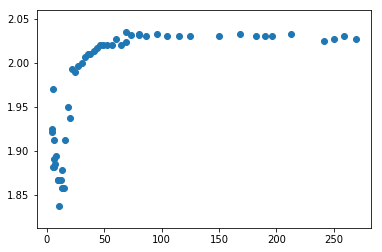

In [76]:
plt.scatter(temperatures, gpp_q)

In [77]:
A1, dA1 = rescale_A (A1, dA1, compound)
data = [temperatures, gpp_q, width_q*10000/2, intensity_q/intensity_fit[-1]*A1[-1]]
names = ['T', 'g', 'width', 'intensity']
units = ['K', '', 'T', 'a.u.']
comments = ['pp', 'pp', 'pp', 'pp']
filename = 'C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\MasterThesis_figures\\Li_pp.txt'

save (data, names, units, comments, filename)

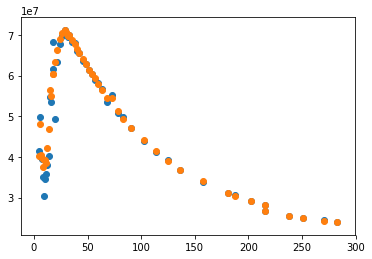

In [54]:
A1, dA1 = rescale_A (A1, dA1, compound)

eps = np.sin(mixing_angle*np.pi/180)
factor = np.sqrt( 1 + eps**2 )
A2, dA2 = rescale_A (A1*factor, dA1, compound)


data = A2
plt.scatter(T, intensity_fit /intensity_fit[-1]*data[-1])
plt.scatter(T, data)

# Use the previous calculations to estimate the error of the fit result

In [121]:
compound = 'Na'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
filename1 = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing_rescaled.txt'
filename2 = folder+'\\python fits\\python_fit_results_single_Lor_without_phase_mixing_rescaled.txt'

T1, g1, dg1, gamma1, dgamma1, A1, dA1, l1, dl1, m1, dm1, n1, dn1, freq1, mixing_angle1, dangle1 = data_import(filename1, 3)
T2, g2, dg2, gamma2, dgamma2, A2, dA2, l2, dl2, m2, dm2, n2, dn2, freq2 = data_import(filename2, 3)

<ErrorbarContainer object of 3 artists>

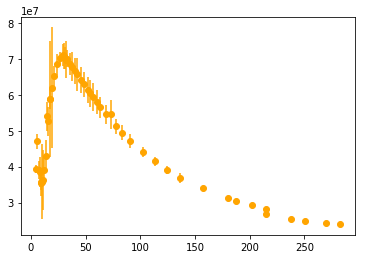

In [122]:
data1 = A1
data2 = A2
delta_data1 = abs(A1 - A2 )
delta_data2 = abs(A1 - intensity_q * A1[-1]/intensity_q[-1] )
delta_data = np.array([max([delta_data1[i], delta_data2[i]]) for i in np.arange(len(A1))])

#delta_data[36] = delta_data[39]

mask = T1 < 300

plt.errorbar(T1[mask], data1[mask], yerr = delta_data[mask], fmt='o', c='orange')
#plt.scatter(T2, data2)
#plt.ylim([1.98, 2.18])

In [123]:
dg1 = abs(g1-g2)
dg1[36] = dg1[39]

delta_data1 = abs(A1 - A2 )
delta_data2 = abs(A1 - intensity_q * A1[-1]/intensity_q[-1] )
dA1 = np.array([max([delta_data1[i], delta_data2[i]]) for i in np.arange(len(A1))])

delta_data1 = abs(gamma1 - gamma2 )
delta_data2 = abs(gamma1 - width_q*10000/2 )
dgamma1 = np.array([max([delta_data1[i], delta_data2[i]]) for i in np.arange(len(A1))])

dl = abs(l1 - l2 )
dm = abs(m1 - m2 )
dn = abs(n1 - n2 )

In [124]:
data = [ T, g1, dg1, gamma1, dgamma1, A1, dA1,
        l1, dl, m1, dm, n1, dn, freq, mixing_angle1, np.sqrt(dangle1) ]        
names = ['T', 'g1', 'delta g1', 'gamma1', 'delta gamma1', 'intensity1', 'delta intensity1',
        #'g2', 'delta g2', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency', 'mixing angle', 'delta angle']
units = ['K', '', '', 'G', 'G', 'a.u.', 'a.u.', 
         #'', '', 'G', 'G', 'a.u.', 'a.u.', 
         '', '', '', '', '', '', 'GHz', 'degree', 'degree']
comments = ['', '', '', '', '', '', '', 
            #'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 
            '', '', '', '', '', '', '', '', '']
filename = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing_rescaled.txt'

save (data, names, units, comments, filename)